In [2]:
pip install gseapy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for gseapy from https://files.pythonhosted.org/packages/b4/40/f110b321d9454ecdd9efae7d01a27628fb3f3521c212b993dfa52a1cb66d/gseapy-1.1.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.2/549.2 kB 11.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [4]:
gp.__version__

'1.1.5'

In [5]:
from gseapy import Biomart
bm = Biomart()

In [13]:
## view validated marts
# marts = bm.get_marts()
## view validated dataset
# datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
## view validated attributes
# attrs = bm.get_attributes(dataset='mmusculus_gene_ensembl')
## view validated filters
# filters = bm.get_filters(dataset='mmusculus_gene_ensembl')
## query results
queries ={'ensembl_gene_id': ['ENSMUSG00000019768','ENSMUSG00000030265'] } # need to be a dict object
results = bm.query(dataset='mmusculus_gene_ensembl',
                   attributes=['ensembl_gene_id', 'external_gene_name', 'entrezgene_id', 'go_id'],
                   filters=queries)
results.tail()

,ensembl_gene_id,external_gene_name,entrezgene_id,go_id
135,ENSMUSG00000030265,Kras,16653,GO:0060509
136,ENSMUSG00000030265,Kras,16653,GO:0021897
137,ENSMUSG00000030265,Kras,16653,GO:0019002
138,ENSMUSG00000030265,Kras,16653,GO:0030275
139,ENSMUSG00000030265,Kras,16653,NaN


In [7]:
results.dtypes

ensembl_gene_id       object
external_gene_name    object
entrezgene_id          Int32
go_id                 object
dtype: object

In [10]:
from gseapy import Biomart
bm = Biomart(host='useast.ensembl.org')
# note the dataset and attribute names are different
m2h = bm.query(dataset='mmusculus_gene_ensembl', 
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

h2m = bm.query(dataset='hsapiens_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'mmusculus_homolog_ensembl_gene',
                           'mmusculus_homolog_associated_gene_name'])

In [11]:
# h2m.sample(10)

In [12]:
# get a dict symbol mappings
h2m_dict = {}
for i, row in h2m.loc[:,["external_gene_name", "mmusculus_homolog_associated_gene_name"]].iterrows():
    if row.isna().any(): continue
    h2m_dict[row['external_gene_name']] = row["mmusculus_homolog_associated_gene_name"]
# read gmt file into dict
kegg = gp.read_gmt(path="tests/extdata/enrichr.KEGG_2016.gmt")
print(kegg['MAPK signaling pathway Homo sapiens hsa04010'][:10])

FileNotFoundError: [Errno 2] No such file or directory: 'tests/extdata/enrichr.KEGG_2016.gmt'

In [14]:
kegg_mouse = {}
for term, genes in kegg.items():
    new_genes = []
    for gene in genes:
        if gene in h2m_dict:
            new_genes.append(h2m_dict[gene])
    kegg_mouse[term] = new_genes
print(kegg_mouse['MAPK signaling pathway Homo sapiens hsa04010'][:10])

NameError: name 'kegg' is not defined

In [15]:
from gseapy import Msigdb

In [16]:
msig = Msigdb()
# mouse hallmark gene sets
gmt = msig.get_gmt(category='mh.all', dbver="2024.1.Mm")

In [18]:
# list msigdb version you wanna query
msig.list_dbver()
# list categories given dbver.
msig.list_category(dbver="2024.1.Mm") # mouse

['m1.all',
 'm2.all',
 'm2.cgp',
 'm2.cp.biocarta',
 'm2.cp.reactome',
 'm2.cp',
 'm2.cp.wikipathways',
 'm3.all',
 'm3.gtrd',
 'm3.mirdb',
 'm5.all',
 'm5.go.bp',
 'm5.go.cc',
 'm5.go.mf',
 'm5.go',
 'm5.mpt',
 'm8.all',
 'mh.all',
 'msigdb']

In [21]:
print(gmt['HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION'])

['Abi3bp', 'Acta2', 'Adam12', 'Anpep', 'Aplp1', 'Areg', 'Basp1', 'Bdnf', 'Bgn', 'Bmp1', 'Cadm1', 'Cald1', 'Calu', 'Cap2', 'Capg', 'Ccn1', 'Ccn2', 'Cd44', 'Cdh11', 'Cdh2', 'Cdh6', 'Col11a1', 'Col12a1', 'Col16a1', 'Col1a1', 'Col1a2', 'Col3a1', 'Col4a1', 'Col4a2', 'Col5a1', 'Col5a2', 'Col5a3', 'Col6a2', 'Col6a3', 'Col7a1', 'Col8a2', 'Colgalt1', 'Comp', 'Copa', 'Crlf1', 'Cthrc1', 'Cxcl12', 'Cxcl15', 'Cxcl5', 'Dab2', 'Dcn', 'Dkk1', 'Dpysl3', 'Dst', 'Ecm1', 'Ecm2', 'Edil3', 'Efemp2', 'Eln', 'Emp3', 'Eno2', 'Fap', 'Fas', 'Fbln1', 'Fbln2', 'Fbln5', 'Fbn1', 'Fbn2', 'Fermt2', 'Fgf2', 'Flna', 'Fmod', 'Fn1', 'Foxc2', 'Fstl1', 'Fstl3', 'Fuca1', 'Fzd8', 'Gadd45a', 'Gadd45b', 'Gas1', 'Gem', 'Gja1', 'Glipr1', 'Gm21451', 'Gpc1', 'Gpx7', 'Grem1', 'Htra1', 'Id2', 'Igfbp2', 'Igfbp3', 'Igfbp4', 'Il15', 'Il6', 'Inhba', 'Itga2', 'Itga5', 'Itgav', 'Itgb1', 'Itgb3', 'Itgb5', 'Jun', 'Lama1', 'Lama2', 'Lama3', 'Lamc1', 'Lamc2', 'Lgals1', 'Lox', 'Loxl1', 'Lrp1', 'Lrrc15', 'Lum', 'Magee1', 'Matn2', 'Matn3', 'Mcm7'

In [23]:
# mouse Enrichr API
mouse = gp.get_library_name(organism='Mouse')
mouse[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [24]:
## download library or read a .gmt file
go_mf = gp.get_library(name='GO_Molecular_Function_2018', organism='Mouse')
print(go_mf['ATP binding (GO:0005524)'])

['ACVR1', 'HSPA1L', 'ACOD1', 'RUNX3', 'SMARCA5', 'ABCA12', 'HSPA1A', 'SIK2', 'SIK3', 'NAIP', 'SIK1', 'TP53', 'HSPA1B', 'PI4K2A', 'PDXK', 'EPB42', 'PNKP', 'ATP5A1', 'HNRNPU', 'UHMK1', 'NUAK2', 'AKT3', 'CLP1', 'MOV10L1', 'MTHFD1L', 'AKT1', 'STK38L', 'AKT2', 'N4BP2', 'LONP1', 'ABCA2', 'INSR', 'ABCA1', 'DMPK', 'PRKCI', 'PLK1', 'MTHFS', 'HASPIN', 'SRPK1', 'CLPX', 'SRPK2', 'LATS2', 'LATS1', 'TPX2', 'WNK1', 'WNK2', 'WNK3', 'WNK4', 'BTK', 'HYOU1', 'HSPA4L', 'SMC4', 'NLK', 'HSPH1', 'MYO18A', 'PDK4', 'PRKACB', 'PDK3', 'PDK2', 'SPHK1', 'SYN3', 'NME1', 'SYN2', 'SYN1', 'ICK', 'ACVRL1', 'FICD', 'DHX9', 'PIF1', 'IDE', 'IGHMBP2', 'KIF14', 'TWF2', 'TWF1', 'SEC14L3', 'STK36', 'STK38', 'MAP3K20', 'MAP4K2', 'MAP4K3', 'CDKL5', 'MAP4K1', 'PNPLA8', 'TRNT1', 'MYO9B', 'STK17A', 'STK17B', 'NEK11', 'TSSK6', 'TAOK1', 'TRIP13', 'TSSK4', 'CARS2', 'TSSK2', 'TSSK3', 'RYR1', 'NDUFA13', 'PRKAG2', 'PYGL', 'OLA1', 'PRKAG1', 'HSPA14', 'HSPA13', 'RECQL4', 'ENPP1', 'MAP4K4', 'MAP4K5', 'ABCG8', 'GSS', 'TAP1', 'TRPV1', 'MSH2'

In [25]:
# read in an example gene list
gene_list = pd.read_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/somatic_mutations.csv",header=None, sep="\t")
gene_list.head()

,0
0,Aldh1a1
1,Gabra2
2,Ago1
3,Cebpz
4,Stk11ip


In [26]:
# convert dataframe or series to list
glist = gene_list.squeeze().str.strip().to_list()
print(glist[:10])

['Aldh1a1', 'Gabra2', 'Ago1', 'Cebpz', 'Stk11ip', 'Galnt18', 'Ptprs', 'Zgrf1', 'Cfap54', 'Tpo']


In [28]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2024','KEGG_2019_Mouse'],
                 organism='Mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

2025-02-18 15:50:26,812 [WARNING] Input library not found: MSigDB_Hallmark_2024. Skip


In [29]:
# obj.results stores all results
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Mouse,Cholesterol metabolism,6/49,0.005801,0.999995,0,0,4.034169,20.774632,SCARB1;NPC1;VDAC1;LRP2;ABCB11;APOB
1,KEGG_2019_Mouse,ECM-receptor interaction,7/83,0.021691,0.999995,0,0,2.662340,10.199020,RELN;ITGA4;LAMA2;COL4A3;COL4A6;SPP1;FN1
2,KEGG_2019_Mouse,Hypertrophic cardiomyopathy (HCM),7/86,0.025785,0.999995,0,0,2.560839,9.367474,CACNB4;ITGA4;LAMA2;CACNA2D3;DMD;PRKAG3;TTN
3,KEGG_2019_Mouse,Taste transduction,7/88,0.028789,0.999995,0,0,2.497349,8.859972,GABRA2;GABRA4;SCN9A;TAS1R1;TAS2R134;ASIC2;SCN3A
4,KEGG_2019_Mouse,Vitamin B6 metabolism,2/9,0.034791,0.999995,0,0,8.226528,27.627991,PHOSPHO2;AOX4


In [ ]:
# read in an example gene list
gene_list = pd.read_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/somatic_mutations.csv",header=None, sep="\t")
gene_list.head()

In [38]:
import gseapy
from gseapy import enrichr

gseapy.enrichr(gene_list='/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/somatic_mutations.txt',  gene_sets='KEGG_2019_Mouse')

In [74]:
# read in an example gene list
gene_list = pd.read_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/somatic_mutations.csv",header=None, sep="\t")
gene_list.head()

,0
0,Aldh1a1
1,Gabra2
2,Ago1
3,Cebpz
4,Stk11ip


In [59]:
import pandas as pd

# Load the gene list (assuming the gene names are in the first column)
gene_df = pd.read_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/plot/CPT6/rivers/somatic_mutations.csv",
                      header=None, sep="\t")

# Rename the first column for clarity (adjust if your file has more columns)
gene_df.columns = ['gene']

# Remove duplicate gene names
unique_genes = gene_df['gene'].drop_duplicates()

filtered_genes = filtered_genes.str.replace(r'\(.*$', '', regex=True)

# Filter out:
# - Genes that end with "Rik"
# - Genes that start with "Gm"
filtered_genes = unique_genes[
    ~unique_genes.str.endswith("Rik") &
    ~unique_genes.str.startswith("Gm")
].reset_index(drop=True)

filtered_genes = filtered_genes.str.replace(r'\s*\(.*$', '', regex=True)

# Print or further process the filtered gene list
print(filtered_genes)
filtered_genes.to_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/filtered_somatic_mutations_simple.csv", index=False, header=False)

0        Cimip4
1         Bmpr2
2          Cps1
3         Obsl1
4          Irs1
         ...   
407       Glis3
408        Mxi1
409        Aco2
410    37kbp CL
411    306bp CL
Name: gene, Length: 412, dtype: object


In [4]:
import pandas as pd
from gseapy import Biomart

# Read the file into a DataFrame
mouse_genes_df = pd.read_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/somatic_mutations.txt", header=None, names=["mouse_gene_name"])

# Query Biomart for mouse-to-human gene mapping
bm = Biomart(host='useast.ensembl.org')
m2h = bm.query(dataset='mmusculus_gene_ensembl', 
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

# Convert to DataFrame
m2h_df = pd.DataFrame(m2h)

# Merge based on external gene name (mouse gene symbol)
merged_df = mouse_genes_df.merge(m2h_df, left_on='mouse_gene_name', right_on='external_gene_name', how='left')

# Keep only necessary columns
human_df = merged_df[['mouse_gene_name', 'hsapiens_homolog_associated_gene_name']]


# Save only the human gene column without the header
human_df['hsapiens_homolog_associated_gene_name'].dropna().to_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/somatic_mutations_human.txt", index=False, header=False)


# Display the results
print(human_df.head())



  mouse_gene_name hsapiens_homolog_associated_gene_name
0         Aldh1a1                               ALDH1A1
1          Gabra2                                GABRA2
2            Ago1                                  AGO1
3           Cebpz                                 CEBPZ
4         Stk11ip                               STK11IP


In [10]:
import gseapy
from gseapy import enrichr

# Run enrichment analysis using Enrichr on your gene list
enr = gseapy.enrichr(
    gene_list='/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/somatic_mutations_human.txt',
    gene_sets=['Human_Gene_Atlas'],     
    organism='Human',                 
    outdir='/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/enrichr_human', 
    cutoff=1
)

# View the top results
print(enr.results.head())


           Gene_set                Term Overlap   P-value  Adjusted P-value  \
0  Human_Gene_Atlas      GlobusPallidus    2/59  0.039819          0.761486   
1  Human_Gene_Atlas               Liver   7/618  0.048113          0.761486   
2  Human_Gene_Atlas  TrigeminalGanglion   3/196  0.088052          0.761486   
3  Human_Gene_Atlas        Hypothalamus    2/97  0.095237          0.761486   
4  Human_Gene_Atlas              retina   3/218  0.111834          0.761486   

   Old P-value  Old Adjusted P-value  Odds Ratio  Combined Score  \
0            0                     0    6.628571       21.366602   
1            0                     0    2.209067        6.702747   
2            0                     0    2.944400        7.154396   
3            0                     0    3.969524        9.333878   
4            0                     0    2.640161        5.783906   

                                               Genes  
0                                        NR5A1;MYO3B  
1  MSR

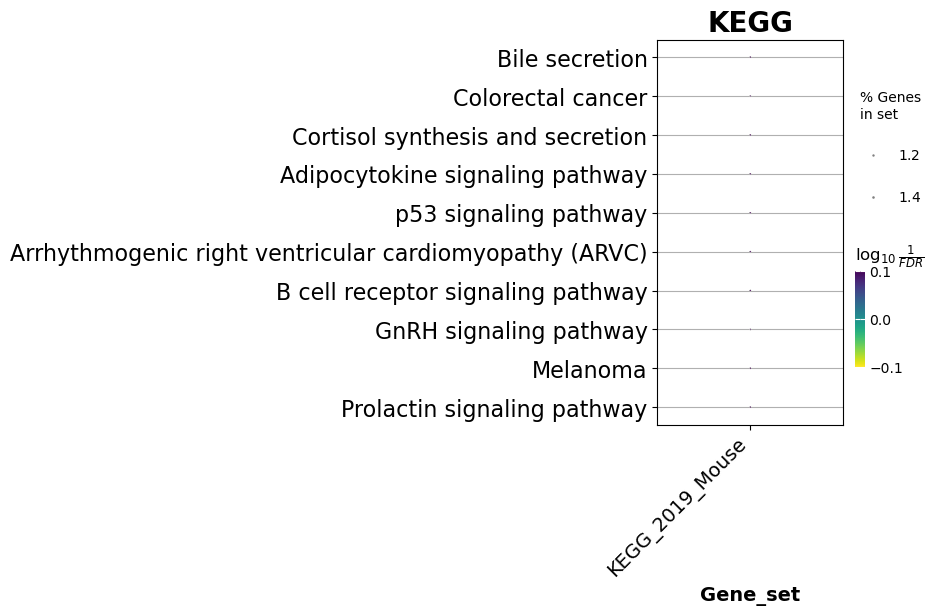

In [55]:
# simple plotting function
from gseapy import barplot, dotplot

# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
              cutoff=1
             )

In [16]:
import pandas as pd

# Load the Excel file
file_path = "/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/subclone/CPT6-river.csv"
df = pd.read_csv(file_path) 

# Display column names
print(df.columns)

# Step 1: Keep only rows where subclone == 1
df_filtered = df[df['clone'] == 1]

# Step 2: Keep only rows with specific mutation types
mutation_types = ["nonsynonymous", "spliceSite", "nonsense", "frameshift"]
df_filtered = df_filtered[df_filtered['type'].isin(mutation_types)]

# Step 3: Merge rows with the same gene name 
df_filtered = df_filtered.groupby('name', as_index=False).agg(lambda x: ', '.join(x.astype(str)))

# Step 4: Remove genes that start with "Gm" or end with "Rik"
df_filtered = df_filtered[~df_filtered['name'].str.startswith("Gm")]
df_filtered = df_filtered[~df_filtered['name'].str.endswith("Rik")]

# Step 5: Save the filtered results
output_path = "/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/subclone1.csv"
df_filtered.to_csv(output_path, index=False)

print(df_filtered.head())

Index(['chr', 'start', 'end', 'name', 'clone', 'clonality.liver',
       'clonality.tumor', 'error.liver', 'error.tumor', 'severity', 'type',
       'AApos', 'AAbefore', 'AAafter', 'isCCGD', 'CCGDstudies',
       'CCGDcancerTypes', 'CCGDcosmic', 'CCGDcgc', 'CCGDranks'],
      dtype='object')
Empty DataFrame
Columns: [name, chr, start, end, clone, clonality.liver, clonality.tumor, error.liver, error.tumor, severity, type, AApos, AAbefore, AAafter, isCCGD, CCGDstudies, CCGDcancerTypes, CCGDcosmic, CCGDcgc, CCGDranks]
Index: []


In [19]:
import pandas as pd

# Load the CSV file
file_path = "/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/subclone/CPT6-river.csv"
df = pd.read_csv(file_path)

# Step 1: Keep only rows where clone == 1 (excluding the header row from processing)
df_filtered = df[df['clone'] == '3']

# Step 2: Keep only rows with specific mutation types
mutation_types = ["nonsynonymous", "spliceSite", "nonsense", "frameshift"]
df_filtered = df_filtered[df_filtered['type'].isin(mutation_types)]

# Step 3: Extract gene names before "(" and merge rows with the same gene name
df_filtered['gene_name'] = df_filtered['name'].str.extract(r'(\w+)')  # Extracts gene name before "("
df_filtered = df_filtered.groupby('gene_name', as_index=False).agg(lambda x: ', '.join(x.astype(str)))

# Step 4: Remove genes that start with "Gm" or end with "Rik"
df_filtered = df_filtered[~df_filtered['gene_name'].str.startswith("Gm", na=False)]
df_filtered = df_filtered[~df_filtered['gene_name'].str.endswith("Rik", na=False)]

# Step 5: Save the filtered results
output_path = "/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/subclone/subclone3.csv"
df_filtered.to_csv(output_path, index=False)

print(df_filtered.head())


   gene_name chr        start          end                          name  \
0       Ago1   4  126443241.0  126443241.0           Ago1 (4) spliceSite   
1      Bcas3  11   85822050.0   85822050.0      Bcas3 (11) nonsynonymous   
2      Cpxm2   7  132049038.0  132049038.0       Cpxm2 (7) nonsynonymous   
3  D17H6S53E  17   35127766.0   35127766.0  D17H6S53E (17) nonsynonymous   
4   Dcaf12l1   X   44789688.0   44789688.0         Dcaf12l1 (X) nonsense   

  clone clonality.liver clonality.tumor  error.liver  error.tumor  ...  \
0     3             0.0     0.258823529  0.032942383  0.118255362  ...   
1     3             0.0     0.388349515  0.019903547  0.118679038  ...   
2     3             0.0     0.362068966  0.022294119  0.102593535  ...   
3     3             0.0     0.304093567  0.017976563  0.082459815  ...   
4     3             0.0     0.095238095  0.013242653  0.904761905  ...   

            type  AApos AAbefore AAafter isCCGD CCGDstudies CCGDcancerTypes  \
0     spliceSite   

In [1]:
def check_for_gene(dict, gene):
    # Step 1: Combine all dataframes into a single dataframe
    combined_df = pd.concat(dict.values(), keys=dict.keys(), names=['Sample'])
    combined_df = combined_df.reset_index(level='Sample')
    
    # Step 2: Filter for oncogenes
    all_genes = combined_df['Gene Symbol'].unique()

    return gene in all_genes

In [2]:
import pandas as pd

def read_vep_output(file_path):
    with open(file_path, 'r') as file:
        # Skip lines until the header is found
        for line in file:
            if line.startswith('#') and not line.startswith('##'):
                header = line[1:].strip().split('\t')  # Remove '#' and split the header
                break

    # Read the file into a pandas DataFrame, using the header found above
    df = pd.read_csv(file_path, comment='#', sep='\t', names=header, header=None)
    

    return df

In [3]:
import os

folder_path = '/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Mutect2/tumor_vs_liver_maf'


dataframe_dict = {}

original_shapes = {}

for subfolder in os.listdir(folder_path):
    if subfolder.endswith('liver'):
        vep_path = os.path.join(folder_path, subfolder, subfolder + ".mutect2.txt")
        vep_df = read_vep_output(vep_path)
        dataframe_dict[subfolder] = vep_df
        original_shapes[subfolder] = vep_df.shape
    else:
        continue

original_shapes

{'filtered_tumor_vs_liver': (372133, 14)}

In [4]:
def filter_vep_output(df):
    # Ensure the columns 'Gene' and 'Extra' exist in the DataFrame
    if 'Gene' not in df.columns or 'Extra' not in df.columns:
        raise ValueError("DataFrame must contain 'Gene' and 'Extra' columns.")
    
    # Filter for gene IDs that start with 'ENS'
    ens_filter = df['Gene'].str.startswith('ENS')
    
    # Filter for 'Extra' column containing 'IMPACT=HIGH' or 'IMPACT=MODERATE'
    high_impact_filter = df['Extra'].str.contains('IMPACT=HIGH')
    moderate_impact_filter = df['Extra'].str.contains('IMPACT=MODERATE')
    
    # Combine filters with correct grouping
    filtered_df = df[ens_filter & (high_impact_filter | moderate_impact_filter)]
    # filtered_df = df[ens_filter]
    
    return filtered_df


In [5]:
filtered_dataframe_dict = {}
filtered_shapes = {}

for key, item in dataframe_dict.items():
    filtered_df = filter_vep_output(item)
    filtered_dataframe_dict[key] = filtered_df
    filtered_shapes[key] = filtered_df.shape

print(filtered_shapes)


{'filtered_tumor_vs_liver': (2130, 14)}


In [6]:
gene = "ENSMUSG00000019768" #ESR1
column = "Gene"

for key, df in filtered_dataframe_dict.items():
    # Subset the dataframe to rows where the "Gene" column matches the requested gene
    subset = df.loc[df[column] == gene]
    
    # Check if there are any matching rows
    if not subset.empty:
        print(f"Matches found in {key}:")
        print(subset)
    else:
        print(f"No matches found in {key}")

No matches found in filtered_tumor_vs_liver


In [7]:
from pybiomart import Dataset
import pandas as pd

def find_homologs(gene_ids):
    try:
        # Load the Ensembl dataset for mouse genes
        mouse_dataset = Dataset(name='mmusculus_gene_ensembl', host='http://www.ensembl.org')
        # print(mouse_dataset.head(10))
        
        # Query the dataset for homologs of the rat gene using 'gene_id' filter
        result = mouse_dataset.query(attributes=[
            'ensembl_gene_id', 
            'hsapiens_homolog_ensembl_gene'
        ], filters={'link_ensembl_gene_id': gene_ids})
       
        # If no homologs are found, return an empty DataFrame
        if not result.empty:
            return result
        else:
            print("result empty")
            return pd.DataFrame()  # Return empty DataFrame if no results found
     
    except Exception as e:
        print(f"Error finding homologs: {e}")
        return pd.DataFrame()  # Return empty DataFrame in case of an error

In [8]:
import sys


def chunk_list(lst, chunk_size):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]


homolog_dict = {}

for key, item in filtered_dataframe_dict.items():
    gene_ids = item["Gene"].tolist()

    
    # Initialize an empty dataframe to store the results
    all_results = pd.DataFrame()

    # Process each chunk of gene_ids
    for chunk in chunk_list(gene_ids, 200):
        results = find_homologs(chunk)
        all_results = pd.concat([all_results, results], ignore_index=True)
    
    # Merge the dataframes on the gene identifiers
    item = item.merge(all_results, left_on='Gene', right_on='Gene stable ID', how='left')
    
    # Rename the columns to match your desired output
    item.rename(columns={'Human gene stable ID': 'Homologs'}, inplace=True)
    
    # Drop the extra column if you don't need it
    item.drop(columns=['Gene stable ID'], inplace=True)


    item = item[item['Homologs'].notna()]
    homolog_dict[key] = item



In [9]:
from pybiomart import Dataset

def find_symbols(ensembl_ids):
    try:
        # Load the Ensembl dataset for human genes

        dataset = Dataset(name='hsapiens_gene_ensembl', host='http://useast.ensembl.org')
        result = dataset.query(attributes=['ensembl_gene_id','external_gene_name', ],
                              filters={'link_ensembl_gene_id': ensembl_ids})

        # Extract the homolog gene IDs if they exist
        if not result.empty:
            return result
    except Exception as e:
        print(f"Error finding GeneSymbols for {ensembl_ids}: {e}")
    return ensembl_ids, None



In [10]:
import sys

def chunk_list(lst, chunk_size):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]

symbol_dict = {}

for key, item in homolog_dict.items():
    ensembl_ids = item["Homologs"].tolist()


    # Initialize an empty dataframe to store the results
    all_results = pd.DataFrame()

    # Process each chunk of gene_ids
    for chunk in chunk_list(ensembl_ids, 200):
        results = find_symbols(chunk)
        all_results = pd.concat([all_results, results], ignore_index=True)
    
    # Merge the dataframes on the gene identifiers
    item = item.merge(all_results, left_on='Homologs', right_on='Gene stable ID', how='left')
    
    # Rename the columns to match your desired output
    item.rename(columns={'Gene name': 'Gene Symbol'}, inplace=True)

    # Drop the extra column if you don't need it
    item.drop(columns=['Gene stable ID'], inplace=True)


    item = item[item['Gene Symbol'].notna()]
    symbol_dict[key] = item


In [11]:
print(symbol_dict)

{'filtered_tumor_vs_liver':                                      Uploaded_variation  \
0                     10_7473269_-/ACAGACAGACAGACAGACAG   
1                     10_7473269_-/ACAGACAGACAGACAGACAG   
2                     10_7473269_-/ACAGACAGACAGACAGACAG   
3                     10_7473269_-/ACAGACAGACAGACAGACAG   
4                     10_7473269_-/ACAGACAGACAGACAGACAG   
...                                                 ...   
1917  X_153153310_-/AATAACTTTGCATCTGATGTCAATGAGTTAGT...   
1918                                  X_153499477_ACC/-   
1919                                  X_159414733_GGC/-   
1920                                  X_159988452_GCG/-   
1921                                    X_164423401_-/T   

                   Location  \
0        10:7473268-7473269   
1        10:7473268-7473269   
2        10:7473268-7473269   
3        10:7473268-7473269   
4        10:7473268-7473269   
...                     ...   
1917  X:153153309-153153310   
1918  X:1534994

In [53]:
gene = "SMARCA2"
column = "Gene Symbol"

for key, df in symbol_dict.items():
    # Subset the dataframe to rows where the "Gene" column matches the requested gene
    subset = df.loc[df[column] == gene]
    
    # Check if there are any matching rows
    if not subset.empty:
        print(f"Matches found in {key}:")
        print(subset)
    else:
        print(f"No matches found in {key}")


Matches found in filtered_tumor_vs_liver:
          Uploaded_variation              Location Allele                Gene  \
543        19_26631011_-/CAA  19:26631010-26631011    CAA  ENSMUSG00000024921   
544        19_26631011_-/CAA  19:26631010-26631011    CAA  ENSMUSG00000024921   
545        19_26631011_-/CAA  19:26631010-26631011    CAA  ENSMUSG00000024921   
546        19_26631011_-/CAA  19:26631010-26631011    CAA  ENSMUSG00000024921   
547        19_26631011_-/CAA  19:26631010-26631011    CAA  ENSMUSG00000024921   
548        19_26631014_-/CAA  19:26631013-26631014    CAA  ENSMUSG00000024921   
549        19_26631014_-/CAA  19:26631013-26631014    CAA  ENSMUSG00000024921   
550        19_26631014_-/CAA  19:26631013-26631014    CAA  ENSMUSG00000024921   
551        19_26631014_-/CAA  19:26631013-26631014    CAA  ENSMUSG00000024921   
552        19_26631014_-/CAA  19:26631013-26631014    CAA  ENSMUSG00000024921   
553  19_26631018_AA/CC/AGCCA  19:26631018-26631019     CC  ENSMUSG0

In [ ]:
import pandas as pd
from gseapy import Biomart

# Read the file into a DataFrame
mouse_genes_df = pd.read_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/somatic_mutations.txt", header=None, names=["mouse_gene_name"])

# Query Biomart for mouse-to-human gene mapping
bm = Biomart(host='useast.ensembl.org')
m2h = bm.query(dataset='mmusculus_gene_ensembl', 
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

# Convert to DataFrame
m2h_df = pd.DataFrame(m2h)

# Merge based on external gene name (mouse gene symbol)
merged_df = mouse_genes_df.merge(m2h_df, left_on='mouse_gene_name', right_on='external_gene_name', how='left')

# Keep only necessary columns
human_df = merged_df[['mouse_gene_name', 'hsapiens_homolog_associated_gene_name']]


# Save only the human gene column without the header
human_df['hsapiens_homolog_associated_gene_name'].dropna().to_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/somatic_mutations_human.txt", index=False, header=False)


# Display the results
print(human_df.head())

In [43]:
import pandas as pd
from gseapy import Biomart

# Load the CSV file into a DataFrame
df = pd.read_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/subclone/subclone2.csv")

# Extract the "gene_name" column and rename it
mouse_gene_df = df[['gene_name']].copy()
mouse_gene_df.columns = ['mouse_gene_name']

print(mouse_gene_df.head())

# Query Biomart for mouse-to-human gene mapping
bm = Biomart(host='useast.ensembl.org')
m2h = bm.query(dataset='mmusculus_gene_ensembl', 
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

# Convert to DataFrame
m2h_df = pd.DataFrame(m2h)

# Merge based on external gene name (mouse gene symbol)
merged_df = mouse_gene_df.merge(m2h_df, left_on='mouse_gene_name', right_on='external_gene_name', how='left')

# Keep only necessary columns
human_df = merged_df[['mouse_gene_name', 'hsapiens_homolog_associated_gene_name']]


# Save only the human gene column without the header
human_df['hsapiens_homolog_associated_gene_name'].dropna().to_csv("/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Superfreq/subclone/human_subclone2.csv", index=False, header=False)


# Display the results
print(human_df.head())

  mouse_gene_name
0          Abcb11
1         Adamts3
2           Baz2b
3           Cerkl
4            Ermn
  mouse_gene_name hsapiens_homolog_associated_gene_name
0          Abcb11                                ABCB11
1         Adamts3                               ADAMTS3
2           Baz2b                                 BAZ2B
3           Cerkl                                 CERKL
4            Ermn                                  ERMN


In [44]:
import pandas as pd

# Create a set of gene names from the human_df column for fast lookup
human_genes = set(human_df["hsapiens_homolog_associated_gene_name"])

filtered_symbol_dict = {}
for key, value in symbol_dict.items():
    gene = value["Gene Symbol"]
    # If gene is a Series, extract the first element
    if isinstance(gene, pd.Series):
        gene = gene.iloc[0]
    if gene in human_genes:
        filtered_symbol_dict[key] = value

print(filtered_symbol_dict)


{}


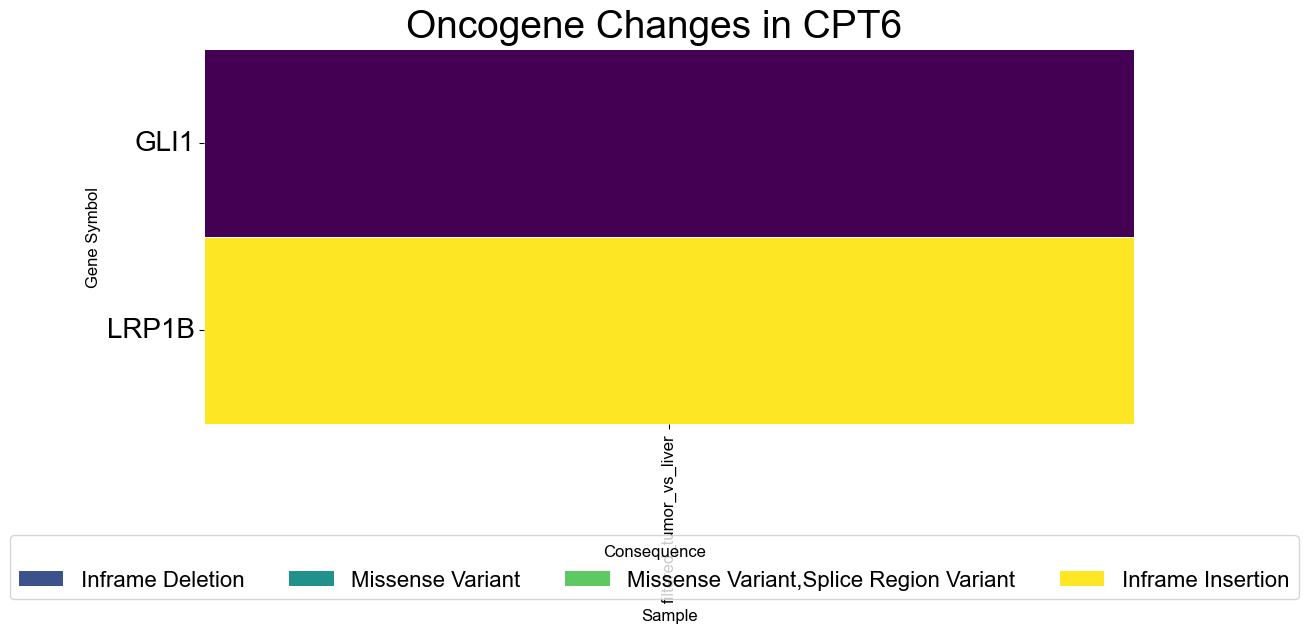

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
import os
from matplotlib import font_manager

# Update the font cache and set default font to Arial
font_path = '/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/Arial.ttf'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Function to classify genes using the OncoKB database
def classify_genes_oncokb(gene_list, oncokb_df):
    tsg_list = oncokb_df[oncokb_df['Is Tumor Suppressor Gene'] == 'Yes']['Hugo Symbol'].tolist()
    oncogene_list = oncokb_df[oncokb_df['Is Oncogene'] == 'Yes']['Hugo Symbol'].tolist()
    tsgs = [gene for gene in gene_list if gene in tsg_list]
    oncogenes = [gene for gene in gene_list if gene in oncogene_list]
    return tsgs + oncogenes

def classify_genes_brca(gene_list, brca_df):
    brca_list = brca_df['Gene'].tolist()
    genes = [gene for gene in gene_list if gene in brca_list]
    return genes

MODE = "ONCOKB"  # or "BRCA"

# Ensure symbol_dict is defined
if 'symbol_dict' not in globals():
    raise ValueError("symbol_dict is not defined.")

# Load the OncoKB and BRCA database files
oncokb_df = pd.read_csv('/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/cancerGeneList.tsv', sep='\t')
brca_df = pd.read_csv('/bgfs/alee/LO_LAB/Personal/Daisong/CPT6/brca_genelist.csv')

# Step 1: Combine all dataframes into a single dataframe
combined_df = pd.concat(symbol_dict.values(), keys=symbol_dict.keys(), names=['Sample'])
combined_df = combined_df.reset_index(level='Sample')

# Check necessary columns
if 'Gene Symbol' not in combined_df.columns or 'Extra' not in combined_df.columns:
    raise ValueError("combined_df must contain 'Gene Symbol' and 'Extra' columns.")

# Step 2: Filter for oncogenes
all_genes = combined_df['Gene Symbol'].unique()

if MODE == "ONCOKB":
    oncogenes = classify_genes_oncokb(all_genes, oncokb_df)
elif MODE == "BRCA":
    oncogenes = classify_genes_brca(all_genes, brca_df)

combined_df = combined_df[combined_df['Gene Symbol'].isin(oncogenes)]

# Filter for subclone genes using human_df
# Assuming human_df is already defined with the column "hsapiens_homolog_associated_gene_name"
human_genes = human_df["hsapiens_homolog_associated_gene_name"].dropna().unique()
combined_df = combined_df[combined_df["Gene Symbol"].isin(human_genes)]

# Step 3: Prepare data for plotting
# Extract IMPACT from the Extra column
combined_df['IMPACT'] = combined_df['Extra'].str.extract(r'IMPACT=([^;]+)')

# Sort by IMPACT, prioritizing 'HIGH' over 'MODERATE'
impact_priority = {'HIGH': 1, 'MODERATE': 2}
combined_df['IMPACT_PRIORITY'] = combined_df['IMPACT'].map(impact_priority)
combined_df = combined_df.sort_values(by=['Sample', 'Gene Symbol', 'IMPACT_PRIORITY'])

# Custom aggregation function to pick the most common consequence for each gene in each sample
def most_common_consequence(sub_df):
    return sub_df.sort_values(by='IMPACT_PRIORITY').iloc[0]

agg_df = combined_df.groupby(['Sample', 'Gene Symbol'], as_index=False, group_keys=False).apply(most_common_consequence)

if agg_df.empty:
    raise ValueError("agg_df is empty. Check your aggregation logic.")

# Create a pivot table with genes as rows and samples as columns
plot_data = agg_df.pivot_table(values='Consequence', index='Gene Symbol', columns='Sample', aggfunc='first')
plot_data = plot_data.sort_index()

# Step 4: Map consequences to numbers for color-coding
unique_consequences = combined_df['Consequence'].unique()
consequence_map = {cons: i+1 for i, cons in enumerate(unique_consequences)}  # Start numbering at 1
plot_data_numeric = plot_data.applymap(lambda x: consequence_map.get(x, 0))  # Use 0 for missing values

# Instead of splitting into columns, use the entire dataset for a single-column heatmap
num_genes = len(plot_data_numeric)
fig_height = max(num_genes * 0.2, 5)  # Adjust the height scaling factor as needed
fig, ax = plt.subplots(figsize=(12, fig_height))

# Plot the heatmap
sns.heatmap(
    plot_data_numeric,
    cmap=ListedColormap(plt.cm.viridis(np.linspace(0, 1, len(unique_consequences) + 1))),
    cbar=False,
    ax=ax,
    linewidths=0.5
)

# Customize tick parameters
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)  # Rotate sample names if needed

# Add a legend for the consequences
legend_elements = [
    plt.Rectangle(
        (0, 0), 1, 1,
        facecolor=ListedColormap(plt.cm.viridis(np.linspace(0, 1, len(unique_consequences) + 1)))(
            consequence_map[cons] / (len(unique_consequences) + 1)
        ),
        edgecolor='none',
        label=cons.replace('_', ' ').title()
    )
    for cons in unique_consequences
]
fig.legend(
    handles=legend_elements,
    title='Consequence',
    bbox_to_anchor=(0.5, -0.05),
    loc='upper center',
    ncol=len(unique_consequences),
    prop={'size': 16}
)

# Add title for the plot
fig.suptitle('Oncogene Changes in CPT6', fontsize=28, fontweight='bold')

# Adjust spacing
plt.subplots_adjust(bottom=0.15, top=0.9)

# Save the plot
output_dir = "output_plots"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, f"oncoplot_single_{MODE}.png")
plt.savefig(output_file, format='png')

plt.show()
